<img src="images/upGrad.png" alt="upGrad" align="Right" style="width: 200px;"/>
<img src="images/IIITB.jpeg" alt="IITB" align="Left" style="width: 200px;"/>

# Telecom Churn Prediction

<b>Author:</b> Karthik Premanand, Anish Mahapatra

<i>Telecom Churn Casestudy </i>

## Problem Statement

## Data Understanding and Exploration

In [50]:
# Importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [52]:
# Reading the dataset
telecom = pd.read_csv("Datasets/telecom_churn_data.csv")

In [53]:
# Sense Check of the Data
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [54]:
# Viewing the shape of the data
telecom.shape

(99999, 226)

In [55]:
# Summary of the dataset
print(telecom.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [56]:
# Printing all the columns with atleast one null value
telecom.columns[telecom.isna().any()].tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',

There are 99999 rows, 226 columns, in the dataset out of which 166 columns have null values

### Exploratory Data Analysis

#### Missing Value Analysis

In [57]:
df = telecom.copy(deep=True)

In [58]:
# Visulalizing the percentage of missing values
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
mobile_number                        mobile_number     0.000000
circle_id                                circle_id     0.000000
loc_og_t2o_mou                      loc_og_t2o_mou     1.018010
std_og_t2o_mou                      std_og_t2o_mou     1.018010
loc_ic_t2o_mou                      loc_ic_t2o_mou     1.018010
last_date_of_month_6          last_date_of_month_6     0.000000
last_date_of_month_7          last_date_of_month_7     0.601006
last_date_of_month_8          last_date_of_month_8     1.100011
last_date_of_month_9          last_date_of_month_9     1.659017
arpu_6                                      arpu_6     0.000000
arpu_7                                      arpu_7     0.000000
arpu_8                                      arpu_8     0.000000
arpu_9                                      arpu_9     0.000000
onnet_mou_6                            onnet_mou_6     3.937039
onnet_mou_7                            onnet_mou_7     3.859039
onnet_mou_8                            onnet_mou_8     5.378054
onnet_mou_9                            onnet_mou_9     7.745077
offnet_mou_6                          offnet_mou_6     3.937039
offnet_mou_7                          offnet_mou_7     3.859039
offnet_mou_8                          offnet_mou_8     5.378054
offnet_mou_9                          offnet_mou_9     7.745077
roam_ic_mou_6                        roam_ic_mou_6     3.937039
roam_ic_mou_7                        roam_ic_mou_7     3.859039
roam_ic_mou_8                        roam_ic_mou_8     5.378054
roam_ic_mou_9                        roam_ic_mou_9     7.745077
roam_og_mou_6                        roam_og_mou_6     3.937039
roam_og_mou_7                        roam_og_mou_7     3.859039
roam_og_mou_8                        roam_og_mou_8     5.378054
roam_og_mou_9                        roam_og_mou_9     7.745077
loc_og_t2t_mou_6                  loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7                  loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8                  loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9                  loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6                  loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7                  loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8                  loc_og_t2m_mou_8     5.378054
loc_og_t2m_mou_9                  loc_og_t2m_mou_9     7.745077
loc_og_t2f_mou_6                  loc_og_t2f_mou_6     3.937039
loc_og_t2f_mou_7                  loc_og_t2f_mou_7     3.859039
loc_og_t2f_mou_8                  loc_og_t2f_mou_8     5.378054
loc_og_t2f_mou_9                  loc_og_t2f_mou_9     7.745077
loc_og_t2c_mou_6                  loc_og_t2c_mou_6     3.937039
loc_og_t2c_mou_7                  loc_og_t2c_mou_7     3.859039
loc_og_t2c_mou_8                  loc_og_t2c_mou_8     5.378054
loc_og_t2c_mou_9                  loc_og_t2c_mou_9     7.745077
loc_og_mou_6                          loc_og_mou_6     3.937039
loc_og_mou_7                          loc_og_mou_7     3.859039
loc_og_mou_8                          loc_og_mou_8     5.378054
loc_og_mou_9                          loc_og_mou_9     7.745077
std_og_t2t_mou_6                  std_og_t2t_mou_6     3.937039
std_og_t2t_mou_7                  std_og_t2t_mou_7     3.859039
std_og_t2t_mou_8                  std_og_t2t_mou_8     5.378054
std_og_t2t_mou_9                  std_og_t2t_mou_9     7.745077
std_og_t2m_mou_6                  std_og_t2m_mou_6     3.937039
std_og_t2m_mou_7                  std_og_t2m_mou_7     3.859039
std_og_t2m_mou_8                  std_og_t2m_mou_8     5.378054
std_og_t2m_mou_9                  std_og_t2m_mou_9     7.745077
std_og_t2f_mou_6                  std_og_t2f_mou_6     3.937039
std_og_t2f_mou_7                  std_og_t2f_mou_7     3.859039
std_og_t2f_mou_8                  std_og_t2f_mou_8     5.378054
std_og_t2f_mou_9                  std_og_t2f_mou_9     7.745077
std_og_t2c_mou_6                  std_og_t2c_mou_6     3.937039
std_og_t2c_

In [59]:
print(telecom['arpu_3g_6'].describe())

count    25153.000000
mean        89.555057
std        193.124653
min        -30.820000
25%          0.000000
50%          0.480000
75%        122.070000
max       6362.280000
Name: arpu_3g_6, dtype: float64


We realize that a lot of the columns have 'NA' values. There are two kinds of missing values here:

* Actual missing - 
    * date_of_last_rech_data_6
    * date_of_last_rech_data_7
    * date_of_last_rech_data_8
    * date_of_last_rech_data_9
    * total_rech_data_6	
    * total_rech_data_7	
    * total_rech_data_8	
    * total_rech_data_9
    * max_rech_data_6
    * max_rech_data_7
    * max_rech_data_8
    * max_rech_data_9
    * av_rech_amt_data_6
    * av_rech_amt_data_7
    * av_rech_amt_data_8
    * av_rech_amt_data_9
    
    
    
* Imputing the values with zero    
    * arpu_3g_6
    * arpu_3g_7
    * arpu_3g_8
    * arpu_3g_9
    * arpu_2g_6
    * arpu_2g_7
    * arpu_2g_8
    * arpu_2g_9
    
    
* Meaningful NA values - 
    * fb_user_6
    * fb_user_7
    * fb_user_8
    * fb_user_9
    * night_pck_user_6
    * night_pck_user_7
    * night_pck_user_8
    * night_pck_user_9
    * count_rech_2g_6
    * count_rech_2g_7
    * count_rech_2g_8
    * count_rech_2g_9
    * count_rech_3g_6
    * count_rech_3g_7
    * count_rech_3g_8
    * count_rech_3g_9
    

    


In [60]:
# Handling indicative missing values
df['arpu_3g_6'].fillna(0, inplace = True) 
df['arpu_3g_7'].fillna(0, inplace = True) 
df['arpu_3g_8'].fillna(0, inplace = True)
df['arpu_3g_9'].fillna(0, inplace = True) 
df['arpu_2g_6'].fillna(0, inplace = True) 
df['arpu_2g_7'].fillna(0, inplace = True)
df['arpu_2g_8'].fillna(0, inplace = True) 
df['arpu_2g_9'].fillna(0, inplace = True)
df['fb_user_6'].fillna(0, inplace = True) 
df['fb_user_7'].fillna(0, inplace = True) 
df['fb_user_8'].fillna(0, inplace = True)
df['fb_user_9'].fillna(0, inplace = True) 
df['night_pck_user_6'].fillna(0, inplace = True) 
df['night_pck_user_7'].fillna(0, inplace = True)
df['night_pck_user_8'].fillna(0, inplace = True) 
df['night_pck_user_9'].fillna(0, inplace = True)
df['count_rech_2g_6'].fillna(0, inplace = True) 
df['count_rech_2g_7'].fillna(0, inplace = True) 
df['count_rech_2g_8'].fillna(0, inplace = True)
df['count_rech_2g_9'].fillna(0, inplace = True) 
df['count_rech_3g_6'].fillna(0, inplace = True) 
df['count_rech_3g_7'].fillna(0, inplace = True)
df['count_rech_3g_8'].fillna(0, inplace = True) 
df['count_rech_3g_9'].fillna(0, inplace = True)

In [61]:
# Dropping columns with more than 70% Actual missing values

df = df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'], axis=1)

In [62]:
# Visulalizing the percentage of missing values after handling the NA values
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
mobile_number                mobile_number     0.000000
circle_id                        circle_id     0.000000
loc_og_t2o_mou              loc_og_t2o_mou     1.018010
std_og_t2o_mou              std_og_t2o_mou     1.018010
loc_ic_t2o_mou              loc_ic_t2o_mou     1.018010
last_date_of_month_6  last_date_of_month_6     0.000000
last_date_of_month_7  last_date_of_month_7     0.601006
last_date_of_month_8  last_date_of_month_8     1.100011
last_date_of_month_9  last_date_of_month_9     1.659017
arpu_6                              arpu_6     0.000000
arpu_7                              arpu_7     0.000000
arpu_8                              arpu_8     0.000000
arpu_9                              arpu_9     0.000000
onnet_mou_6                    onnet_mou_6     3.937039
onnet_mou_7                    onnet_mou_7     3.859039
onnet_mou_8                    onnet_mou_8     5.378054
onnet_mou_9                    onnet_mou_9     7.745077
offnet_mou_6                  offnet_mou_6     3.937039
offnet_mou_7                  offnet_mou_7     3.859039
offnet_mou_8                  offnet_mou_8     5.378054
offnet_mou_9                  offnet_mou_9     7.745077
roam_ic_mou_6                roam_ic_mou_6     3.937039
roam_ic_mou_7                roam_ic_mou_7     3.859039
roam_ic_mou_8                roam_ic_mou_8     5.378054
roam_ic_mou_9                roam_ic_mou_9     7.745077
roam_og_mou_6                roam_og_mou_6     3.937039
roam_og_mou_7                roam_og_mou_7     3.859039
roam_og_mou_8                roam_og_mou_8     5.378054
roam_og_mou_9                roam_og_mou_9     7.745077
loc_og_t2t_mou_6          loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7          loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8          loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9          loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6          loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7          loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8          loc_og_t2m_mou_8     5.378054
loc_og_t2m_mou_9          loc_og_t2m_mou_9     7.745077
loc_og_t2f_mou_6          loc_og_t2f_mou_6     3.937039
loc_og_t2f_mou_7          loc_og_t2f_mou_7     3.859039
loc_og_t2f_mou_8          loc_og_t2f_mou_8     5.378054
loc_og_t2f_mou_9          loc_og_t2f_mou_9     7.745077
loc_og_t2c_mou_6          loc_og_t2c_mou_6     3.937039
loc_og_t2c_mou_7          loc_og_t2c_mou_7     3.859039
loc_og_t2c_mou_8          loc_og_t2c_mou_8     5.378054
loc_og_t2c_mou_9          loc_og_t2c_mou_9     7.745077
loc_og_mou_6                  loc_og_mou_6     3.937039
loc_og_mou_7                  loc_og_mou_7     3.859039
loc_og_mou_8                  loc_og_mou_8     5.378054
loc_og_mou_9                  loc_og_mou_9     7.745077
std_og_t2t_mou_6          std_og_t2t_mou_6     3.937039
std_og_t2t_mou_7          std_og_t2t_mou_7     3.859039
std_og_t2t_mou_8          std_og_t2t_mou_8     5.378054
std_og_t2t_mou_9          std_og_t2t_mou_9     7.745077
std_og_t2m_mou_6          std_og_t2m_mou_6     3.937039
std_og_t2m_mou_7          std_og_t2m_mou_7     3.859039
std_og_t2m_mou_8          std_og_t2m_mou_8     5.378054
std_og_t2m_mou_9          std_og_t2m_mou_9     7.745077
std_og_t2f_mou_6          std_og_t2f_mou_6     3.937039
std_og_t2f_mou_7          std_og_t2f_mou_7     3.859039
std_og_t2f_mou_8          std_og_t2f_mou_8     5.378054
std_og_t2f_mou_9          std_og_t2f_mou_9     7.745077
std_og_t2c_mou_6          std_og_t2c_mou_6     3.937039
std_og_t2c_mou_7          std_og_t2c_mou_7     3.859039
std_og_t2c_mou_8          std_og_t2c_mou_8     5.378054
std_og_t2c_mou_9          std_og_t2c_mou_9     7.745077
std_og_mou_6                  std_og_mou_6     3.937039
std_og_mou_7                  std_og_mou_7     3.859039
std_og_mou_8                  std_og_mou_8     5.378054
std_og_mou_9                  std_og_mou_9     7.745077
isd_og_mou_6                  isd_og_mou_6     3.937039
isd_og_mou_7                  isd_og_mou_7     3.859039
isd

No more columns will be removed as all the remaining missing values are in the acceptable range

#### Calculating derived metrics before dropping date objects

In [63]:
### Calculating the number of days since last recharge for a particular month
df['last_date_of_month_6'] = pd.to_datetime(df['last_date_of_month_6'])
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['day_of_last_rech_6'] = (df['last_date_of_month_6'] - df['date_of_last_rech_6']) / np.timedelta64(1, 'D')
df['week_of_last_rech_6'] = df['day_of_last_rech_6'] % 7


df['last_date_of_month_7'] = pd.to_datetime(df['last_date_of_month_7'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['day_of_last_rech_7'] = (df['last_date_of_month_7'] - df['date_of_last_rech_7']) / np.timedelta64(1, 'D')
df['week_of_last_rech_7'] = df['day_of_last_rech_7'] % 7

df['last_date_of_month_8'] = pd.to_datetime(df['last_date_of_month_8'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])
df['day_of_last_rech_8'] = (df['last_date_of_month_8'] - df['date_of_last_rech_8']) / np.timedelta64(1, 'D')
df['week_of_last_rech_8'] = df['day_of_last_rech_8'] % 7

df['last_date_of_month_9'] = pd.to_datetime(df['last_date_of_month_9'])
df['date_of_last_rech_9'] = pd.to_datetime(df['date_of_last_rech_9'])
df['day_of_last_rech_9'] = (df['last_date_of_month_9'] - df['date_of_last_rech_9']) / np.timedelta64(1, 'D')
df['week_of_last_rech_9'] = df['day_of_last_rech_9'] % 7

In [64]:
### Dropping the date objects

df = df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], axis=1)


In [65]:
### Dropping the mobile number

df = df.drop(['mobile_number'],axis= 1)

In [66]:
# Visulalizing the percentage of missing values after handling the date objects
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
circle_id                      circle_id     0.000000
loc_og_t2o_mou            loc_og_t2o_mou     1.018010
std_og_t2o_mou            std_og_t2o_mou     1.018010
loc_ic_t2o_mou            loc_ic_t2o_mou     1.018010
arpu_6                            arpu_6     0.000000
arpu_7                            arpu_7     0.000000
arpu_8                            arpu_8     0.000000
arpu_9                            arpu_9     0.000000
onnet_mou_6                  onnet_mou_6     3.937039
onnet_mou_7                  onnet_mou_7     3.859039
onnet_mou_8                  onnet_mou_8     5.378054
onnet_mou_9                  onnet_mou_9     7.745077
offnet_mou_6                offnet_mou_6     3.937039
offnet_mou_7                offnet_mou_7     3.859039
offnet_mou_8                offnet_mou_8     5.378054
offnet_mou_9                offnet_mou_9     7.745077
roam_ic_mou_6              roam_ic_mou_6     3.937039
roam_ic_mou_7              roam_ic_mou_7     3.859039
roam_ic_mou_8              roam_ic_mou_8     5.378054
roam_ic_mou_9              roam_ic_mou_9     7.745077
roam_og_mou_6              roam_og_mou_6     3.937039
roam_og_mou_7              roam_og_mou_7     3.859039
roam_og_mou_8              roam_og_mou_8     5.378054
roam_og_mou_9              roam_og_mou_9     7.745077
loc_og_t2t_mou_6        loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7        loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8        loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9        loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6        loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7        loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8        loc_og_t2m_mou_8     5.378054
loc_og_t2m_mou_9        loc_og_t2m_mou_9     7.745077
loc_og_t2f_mou_6        loc_og_t2f_mou_6     3.937039
loc_og_t2f_mou_7        loc_og_t2f_mou_7     3.859039
loc_og_t2f_mou_8        loc_og_t2f_mou_8     5.378054
loc_og_t2f_mou_9        loc_og_t2f_mou_9     7.745077
loc_og_t2c_mou_6        loc_og_t2c_mou_6     3.937039
loc_og_t2c_mou_7        loc_og_t2c_mou_7     3.859039
loc_og_t2c_mou_8        loc_og_t2c_mou_8     5.378054
loc_og_t2c_mou_9        loc_og_t2c_mou_9     7.745077
loc_og_mou_6                loc_og_mou_6     3.937039
loc_og_mou_7                loc_og_mou_7     3.859039
loc_og_mou_8                loc_og_mou_8     5.378054
loc_og_mou_9                loc_og_mou_9     7.745077
std_og_t2t_mou_6        std_og_t2t_mou_6     3.937039
std_og_t2t_mou_7        std_og_t2t_mou_7     3.859039
std_og_t2t_mou_8        std_og_t2t_mou_8     5.378054
std_og_t2t_mou_9        std_og_t2t_mou_9     7.745077
std_og_t2m_mou_6        std_og_t2m_mou_6     3.937039
std_og_t2m_mou_7        std_og_t2m_mou_7     3.859039
std_og_t2m_mou_8        std_og_t2m_mou_8     5.378054
std_og_t2m_mou_9        std_og_t2m_mou_9     7.745077
std_og_t2f_mou_6        std_og_t2f_mou_6     3.937039
std_og_t2f_mou_7        std_og_t2f_mou_7     3.859039
std_og_t2f_mou_8        std_og_t2f_mou_8     5.378054
std_og_t2f_mou_9        std_og_t2f_mou_9     7.745077
std_og_t2c_mou_6        std_og_t2c_mou_6     3.937039
std_og_t2c_mou_7        std_og_t2c_mou_7     3.859039
std_og_t2c_mou_8        std_og_t2c_mou_8     5.378054
std_og_t2c_mou_9        std_og_t2c_mou_9     7.745077
std_og_mou_6                std_og_mou_6     3.937039
std_og_mou_7                std_og_mou_7     3.859039
std_og_mou_8                std_og_mou_8     5.378054
std_og_mou_9                std_og_mou_9     7.745077
isd_og_mou_6                isd_og_mou_6     3.937039
isd_og_mou_7                isd_og_mou_7     3.859039
isd_og_mou_8                isd_og_mou_8     5.378054
isd_og_mou_9                isd_og_mou_9     7.745077
spl_og_mou_6                spl_og_mou_6     3.937039
spl_og_mou_7                spl_og_mou_7     3.859039
spl_og_mou_8                spl_og_mou_8     5.378054
spl_og_mou_9                spl_og_mou_9     7.745077
og_others_6                  og_others_6     3.937039
og_others_7                  og_other

#### Iterative imputation for missing values between 0-8 %

Using sklearn's iterative imputer to calculate missing values for columns in range 1-8%.
<br>**Note:** The initialization strategy depends on the respective column. The estimator used is Bayesian Ridge.
The columns and initialization method are as follows:
- MOU : mean
- OTHERS, DAY_OF_LAST_RECH, WEEK_OF_LAST_RECH : median

In [67]:
# Using sklearn's iterative imputer to calculate missing values for columns in range 1-8%.
## Note: The initialization strategy depends on the respective column. The estimator used is Bayesian Ridge.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='mean')
imp_mean.fit(df)

IterativeImputer(n_nearest_features=4)

In [68]:
df = pd.DataFrame(data=imp_mean.transform(df),
                  columns = list(df.columns.values),
                             dtype='int')

In [69]:
# Visulalizing the percentage of missing values after handling the date objects
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
circle_id                      circle_id          0.0
loc_og_t2o_mou            loc_og_t2o_mou          0.0
std_og_t2o_mou            std_og_t2o_mou          0.0
loc_ic_t2o_mou            loc_ic_t2o_mou          0.0
arpu_6                            arpu_6          0.0
arpu_7                            arpu_7          0.0
arpu_8                            arpu_8          0.0
arpu_9                            arpu_9          0.0
onnet_mou_6                  onnet_mou_6          0.0
onnet_mou_7                  onnet_mou_7          0.0
onnet_mou_8                  onnet_mou_8          0.0
onnet_mou_9                  onnet_mou_9          0.0
offnet_mou_6                offnet_mou_6          0.0
offnet_mou_7                offnet_mou_7          0.0
offnet_mou_8                offnet_mou_8          0.0
offnet_mou_9                offnet_mou_9          0.0
roam_ic_mou_6              roam_ic_mou_6          0.0
roam_ic_mou_7              roam_ic_mou_7          0.0
roam_ic_mou_8              roam_ic_mou_8          0.0
roam_ic_mou_9              roam_ic_mou_9          0.0
roam_og_mou_6              roam_og_mou_6          0.0
roam_og_mou_7              roam_og_mou_7          0.0
roam_og_mou_8              roam_og_mou_8          0.0
roam_og_mou_9              roam_og_mou_9          0.0
loc_og_t2t_mou_6        loc_og_t2t_mou_6          0.0
loc_og_t2t_mou_7        loc_og_t2t_mou_7          0.0
loc_og_t2t_mou_8        loc_og_t2t_mou_8          0.0
loc_og_t2t_mou_9        loc_og_t2t_mou_9          0.0
loc_og_t2m_mou_6        loc_og_t2m_mou_6          0.0
loc_og_t2m_mou_7        loc_og_t2m_mou_7          0.0
loc_og_t2m_mou_8        loc_og_t2m_mou_8          0.0
loc_og_t2m_mou_9        loc_og_t2m_mou_9          0.0
loc_og_t2f_mou_6        loc_og_t2f_mou_6          0.0
loc_og_t2f_mou_7        loc_og_t2f_mou_7          0.0
loc_og_t2f_mou_8        loc_og_t2f_mou_8          0.0
loc_og_t2f_mou_9        loc_og_t2f_mou_9          0.0
loc_og_t2c_mou_6        loc_og_t2c_mou_6          0.0
loc_og_t2c_mou_7        loc_og_t2c_mou_7          0.0
loc_og_t2c_mou_8        loc_og_t2c_mou_8          0.0
loc_og_t2c_mou_9        loc_og_t2c_mou_9          0.0
loc_og_mou_6                loc_og_mou_6          0.0
loc_og_mou_7                loc_og_mou_7          0.0
loc_og_mou_8                loc_og_mou_8          0.0
loc_og_mou_9                loc_og_mou_9          0.0
std_og_t2t_mou_6        std_og_t2t_mou_6          0.0
std_og_t2t_mou_7        std_og_t2t_mou_7          0.0
std_og_t2t_mou_8        std_og_t2t_mou_8          0.0
std_og_t2t_mou_9        std_og_t2t_mou_9          0.0
std_og_t2m_mou_6        std_og_t2m_mou_6          0.0
std_og_t2m_mou_7        std_og_t2m_mou_7          0.0
std_og_t2m_mou_8        std_og_t2m_mou_8          0.0
std_og_t2m_mou_9        std_og_t2m_mou_9          0.0
std_og_t2f_mou_6        std_og_t2f_mou_6          0.0
std_og_t2f_mou_7        std_og_t2f_mou_7          0.0
std_og_t2f_mou_8        std_og_t2f_mou_8          0.0
std_og_t2f_mou_9        std_og_t2f_mou_9          0.0
std_og_t2c_mou_6        std_og_t2c_mou_6          0.0
std_og_t2c_mou_7        std_og_t2c_mou_7          0.0
std_og_t2c_mou_8        std_og_t2c_mou_8          0.0
std_og_t2c_mou_9        std_og_t2c_mou_9          0.0
std_og_mou_6                std_og_mou_6          0.0
std_og_mou_7                std_og_mou_7          0.0
std_og_mou_8                std_og_mou_8          0.0
std_og_mou_9                std_og_mou_9          0.0
isd_og_mou_6                isd_og_mou_6          0.0
isd_og_mou_7                isd_og_mou_7          0.0
isd_og_mou_8                isd_og_mou_8          0.0
isd_og_mou_9                isd_og_mou_9          0.0
spl_og_mou_6                spl_og_mou_6          0.0
spl_og_mou_7                spl_og_mou_7          0.0
spl_og_mou_8                spl_og_mou_8          0.0
spl_og_mou_9                spl_og_mou_9          0.0
og_others_6                  og_others_6          0.0
og_others_7                  og_other

No more missing values, no categorical data to handle

### Filter high value customers

80-20 rule - 80% revenue generated by 20% customers


months 6,7 - good phase

Filteration is based on usage and not revenue generated with equal weightage given to both calling minutes and data usage (calling in terms of mins, data usage in terms of MB)
 
total_calling_usage_6 = total_og_mou_6 + total_ic_mou_6
<br>
total_data_usage_6 = vol_2g_mb_6 + vol_3g_mb_6
<br>
total_calling_usage_7 = total_og_mou_7 + total_ic_mou_7
<br>
total_data_usage_7 = vol_2g_mb_7 + vol_3g_mb_7

<br>
Total usage for months 6 and 7:
<br>
total_usage_6 = total_calling_usage_6 + total_data_usage_6
<br>
total_usage_7 = total_calling_usage_7 + total_data_usage_7

Average usage for months 6 and 7:
<br>
avg_usage_6_7 = (total_usage_6 + total_usage_7)/2

In [70]:
## Generating avg usage for customers for the 'good' months 6 & 7

df['total_calling_usage_6'] = df['total_og_mou_6'] + df['total_ic_mou_6']
df['total_data_usage_6'] = df['vol_2g_mb_6'] + df['vol_3g_mb_6']

df['total_calling_usage_7'] = df['total_og_mou_7'] + df['total_ic_mou_7']
df['total_data_usage_7'] = df['vol_2g_mb_7'] + df['vol_3g_mb_7']

df['total_usage_6'] = df['total_calling_usage_6'] + df['total_data_usage_6']
df['total_usage_7'] = df['total_calling_usage_7'] + df['total_data_usage_7']

df['avg_usage_6_7'] = (df['total_usage_6'] + df['total_usage_7']) / 2


In [71]:
df['avg_usage_6_7'].quantile(0.7)

762.0

In [72]:
df['hvc_flag'] = [1 if x >= df['avg_usage_6_7'].quantile(0.7) else 0 for x in df['avg_usage_6_7']]

In [73]:
### Removing low valued customers

df = df[df.hvc_flag != 0]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30021 entries, 6 to 99997
Columns: 217 entries, circle_id to hvc_flag
dtypes: float64(1), int32(215), int64(1)
memory usage: 25.3 MB


### Deriving target churn variable

Calculate churn variable based on month 9

if (total_calling_usage_9 + total_data_usage_9) = 0:
churn = 1
else churn = 0


In [75]:
df['total_calling_usage_9'] = df['total_og_mou_9'] + df['total_ic_mou_9']
df['total_data_usage_9'] = df['vol_2g_mb_9'] + df['vol_3g_mb_9']

df['total_usage_9'] = df['total_calling_usage_9'] + df['total_data_usage_9']

In [76]:
## Creating target variable

df['churn_flag'] = [1 if x == 0 else 0 for x in df['total_usage_9']]

In [77]:
## Checking the count of churned customers

df['churn_flag'].value_counts(ascending=True)

1     2284
0    27737
Name: churn_flag, dtype: int64

### Removing all columns corresponding to month 9

Explanation - variables not important anymore as predictor variables are needed to calculate churn for the target month 9

In [78]:
## Dropping columns pertaining to month 9 
df = df.drop([col for col in df.columns if '9' in col], axis=1)

In [79]:
## Checking if the remaining variables have missing values

missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

Feature  missing (%)
circle_id                          circle_id          0.0
loc_og_t2o_mou                loc_og_t2o_mou          0.0
std_og_t2o_mou                std_og_t2o_mou          0.0
loc_ic_t2o_mou                loc_ic_t2o_mou          0.0
arpu_6                                arpu_6          0.0
arpu_7                                arpu_7          0.0
arpu_8                                arpu_8          0.0
onnet_mou_6                      onnet_mou_6          0.0
onnet_mou_7                      onnet_mou_7          0.0
onnet_mou_8                      onnet_mou_8          0.0
offnet_mou_6                    offnet_mou_6          0.0
offnet_mou_7                    offnet_mou_7          0.0
offnet_mou_8                    offnet_mou_8          0.0
roam_ic_mou_6                  roam_ic_mou_6          0.0
roam_ic_mou_7                  roam_ic_mou_7          0.0
roam_ic_mou_8                  roam_ic_mou_8          0.0
roam_og_mou_6                  roam_og_mou_6          0.0
roam_og_mou_7                  roam_og_mou_7          0.0
roam_og_mou_8                  roam_og_mou_8          0.0
loc_og_t2t_mou_6            loc_og_t2t_mou_6          0.0
loc_og_t2t_mou_7            loc_og_t2t_mou_7          0.0
loc_og_t2t_mou_8            loc_og_t2t_mou_8          0.0
loc_og_t2m_mou_6            loc_og_t2m_mou_6          0.0
loc_og_t2m_mou_7            loc_og_t2m_mou_7          0.0
loc_og_t2m_mou_8            loc_og_t2m_mou_8          0.0
loc_og_t2f_mou_6            loc_og_t2f_mou_6          0.0
loc_og_t2f_mou_7            loc_og_t2f_mou_7          0.0
loc_og_t2f_mou_8            loc_og_t2f_mou_8          0.0
loc_og_t2c_mou_6            loc_og_t2c_mou_6          0.0
loc_og_t2c_mou_7            loc_og_t2c_mou_7          0.0
loc_og_t2c_mou_8            loc_og_t2c_mou_8          0.0
loc_og_mou_6                    loc_og_mou_6          0.0
loc_og_mou_7                    loc_og_mou_7          0.0
loc_og_mou_8                    loc_og_mou_8          0.0
std_og_t2t_mou_6            std_og_t2t_mou_6          0.0
std_og_t2t_mou_7            std_og_t2t_mou_7          0.0
std_og_t2t_mou_8            std_og_t2t_mou_8          0.0
std_og_t2m_mou_6            std_og_t2m_mou_6          0.0
std_og_t2m_mou_7            std_og_t2m_mou_7          0.0
std_og_t2m_mou_8            std_og_t2m_mou_8          0.0
std_og_t2f_mou_6            std_og_t2f_mou_6          0.0
std_og_t2f_mou_7            std_og_t2f_mou_7          0.0
std_og_t2f_mou_8            std_og_t2f_mou_8          0.0
std_og_t2c_mou_6            std_og_t2c_mou_6          0.0
std_og_t2c_mou_7            std_og_t2c_mou_7          0.0
std_og_t2c_mou_8            std_og_t2c_mou_8          0.0
std_og_mou_6                    std_og_mou_6          0.0
std_og_mou_7                    std_og_mou_7          0.0
std_og_mou_8                    std_og_mou_8          0.0
isd_og_mou_6                    isd_og_mou_6          0.0
isd_og_mou_7                    isd_og_mou_7          0.0
isd_og_mou_8                    isd_og_mou_8          0.0
spl_og_mou_6                    spl_og_mou_6          0.0
spl_og_mou_7                    spl_og_mou_7          0.0
spl_og_mou_8                    spl_og_mou_8          0.0
og_others_6                      og_others_6          0.0
og_others_7                      og_others_7          0.0
og_others_8                      og_others_8          0.0
total_og_mou_6                total_og_mou_6          0.0
total_og_mou_7                total_og_mou_7          0.0
total_og_mou_8                total_og_mou_8          0.0
loc_ic_t2t_mou_6            loc_ic_t2t_mou_6          0.0
loc_ic_t2t_mou_7            loc_ic_t2t_mou_7          0.0
loc_ic_t2t_mou_8            loc_ic_t2t_mou_8          0.0
loc_ic_t2m_mou_6            loc_ic_t2m_mou_6          0.0
loc_ic_t2m_mou_7            loc_ic_t2m_mou_7          0.0
loc_ic_t2m_mou_8            loc_ic_t2m_mou_8          0.0
loc_ic_t2f_mou_6            loc_ic_t2f_mou_6          0.0
loc_ic_t2f_mou_7            loc_ic_

### Handling Outliers for predictor columns

In [80]:
df_out = df.copy(deep=True)

In [81]:
# Remove the outliers

def removeOutliers (dat, columnName):
    q1 = dat[columnName].quantile(0.01)
    q4 = dat[columnName].quantile(0.99)
    dat = dat[(dat[columnName]>=q1) & (dat[columnName]<=q4)]
    return dat

In [82]:
# viewing the columns of the data
df_out.describe()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count    30021.0         30021.0         30021.0         30021.0   
mean       109.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min        109.0             0.0             0.0             0.0   
25%        109.0             0.0             0.0             0.0   
50%        109.0             0.0             0.0             0.0   
75%        109.0             0.0             0.0             0.0   
max        109.0             0.0             0.0             0.0   

             arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30021.000000  30021.000000  30021.000000  30021.000000  30021.000000   
mean     533.955065    533.854002    486.199327    281.159755    286.389661   
std      446.346800    469.749247    482.100951    470.183163    491.000936   
min    -2258.000000  -2014.000000   -945.000000      0.000000    -34.000000   
25%      285.000000    280.000000    218.000000     25.000000     22.000000   
50%      451.000000    448.000000    400.000000    101.000000     97.000000   
75%      675.000000    675.000000    637.000000    327.000000    326.000000   
max    27731.000000  35145.000000  33543.000000   7376.000000   8157.000000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30021.000000  30021.000000  30021.000000  30021.000000   30021.000000   
mean     251.497852    388.890776    390.744412    347.549082      11.420406   
std      467.187252    480.624172    496.924689    476.511487      60.824359   
min      -18.000000   -463.000000      0.000000      0.000000       0.000000   
25%       17.000000     89.000000     84.000000     68.000000       0.000000   
50%       80.000000    241.000000    234.000000    201.000000       0.000000   
75%      269.000000    505.000000    508.000000    454.000000       0.000000   
max    10752.000000   8362.000000   9667.000000  14007.000000    2589.000000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30021.000000   30021.000000   30021.000000   30021.000000   
mean        8.223677      10.390793      16.669631      12.334966   
std        54.924015      62.515714      85.347221      67.551780   
min        -8.000000      -1.000000       0.000000      -1.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2877.000000    2480.000000    3775.000000    1878.000000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30021.000000      30021.000000      30021.000000      30021.000000   
mean       15.261284         98.899903         99.091503         90.223677   
std        84.296561        253.919815        263.112713        248.479171   
min         0.000000       -397.000000         -5.000000        -95.000000   
25%         0.000000          6.000000          6.000000          4.000000   
50%         0.000000         30.000000         29.000000         25.000000   
75%         0.000000         92.000000         91.000000         84.000000   
max      3493.000000       6431.000000       7400.000000      10752.000000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30021.000000      30021.000000      30021.000000      30021.000000   
mean         173.804837        172.405749        161.410379          6.184704   
std          251.283147        242.642919        234.323820         21.664897   
min            0.000000          0.000000          0.000000          0.000000   
25%           26.000000         27.000000         21.000000          0.000000   
50%           88.000000         89.000000         81.000000          0.000000   
75%          229.000000        226.000000        210.000000          

In [83]:
# Removing the 99 percentile and and 1 percentile
#columnNames = list(df.columns.values)
#flag_col_names = ['churn_flag','hvc_flag','fb_user_8','fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']
#targetColumnNames = list(set(columnNames) - set(flag_col_names))
targetColumnNames = ['avg_usage_6_7','arpu_6','arpu_7','arpu_8']

for stringName in targetColumnNames:
    df_out = removeOutliers(df_out, stringName)

In [84]:
df_out

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  arpu_6  \
6            109               0               0               0     429   
8            109               0               0               0     378   
13           109               0               0               0     492   
21           109               0               0               0     514   
24           109               0               0               0     422   
44           109               0               0               0     226   
53           109               0               0               0     978   
56           109               0               0               0     452   
57           109               0               0               0    1201   
59           109               0               0               0     221   
61           109               0               0               0     565   
63           109               0               0               0     254   
67           109               0               0               0     218   
69           109               0               0               0     809   
86           109               0               0               0     319   
87           109               0               0               0     623   
92           109               0               0               0     465   
96           109               0               0               0     676   
101          109               0               0               0     512   
103          109               0               0               0     883   
105          109               0               0               0     659   
115          109               0               0               0    1173   
132          109               0               0               0     238   
133          109               0               0               0     981   
134          109               0               0               0     740   
135          109               0               0               0     192   
136          109               0               0               0     171   
137          109               0               0               0     244   
140          109               0               0               0      94   
146          109               0               0               0       8   
149          109               0               0               0    1001   
157          109               0               0               0     711   
158          109               0               0               0     558   
166          109               0               0               0     326   
170          109               0               0               0     651   
173          109               0               0               0     740   
175          109               0               0               0     424   
176          109               0               0               0     745   
177          109               0               0               0     494   
182          109               0               0               0     225   
185          109               0               0               0     340   
188          109               0               0               0     734   
191          109               0               0               0     213   
195          109               0               0               0     486   
199          109               0               0               0     318   
204          109               0               0               0     653   
206          109               0               0               0     472   
208          109               0               0               0     652   
213          109               0               0               0     640   
218          109               0               0               0     345   
225          109               0               0               0     715   
235          109               0               0       

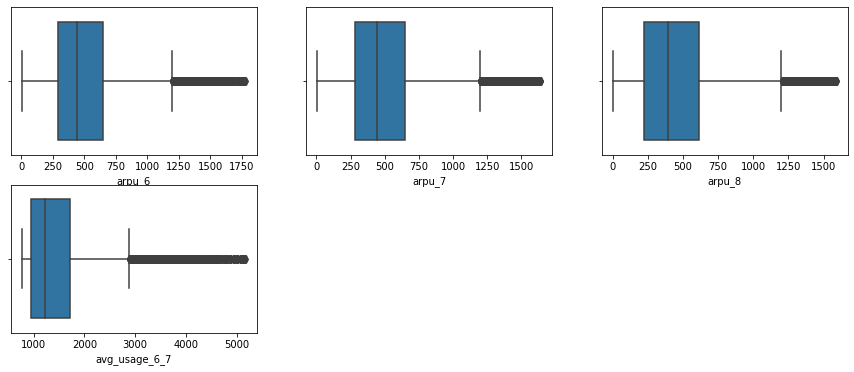

In [85]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'arpu_6', data = df_out)
plt.subplot(2,3,2)
sns.boxplot(x = 'arpu_7', data = df_out)
plt.subplot(2,3,3)
sns.boxplot(x = 'arpu_8', data = df_out)
plt.subplot(2,3,4)
sns.boxplot(x = 'avg_usage_6_7', data = df_out)

### Analysis of Target Variable

In [86]:
#Checking if target variable has class imbalance
df_out['churn_flag'].value_counts(ascending=True)

1     1949
0    25977
Name: churn_flag, dtype: int64

Around 6.9% of the subscribers are churned. There is high class imbalance here which has to be handled.
We will perform SMOTE to generate synthetic samples of minority class on the test dataset AFTER train/test split

### Bivariate Analysis

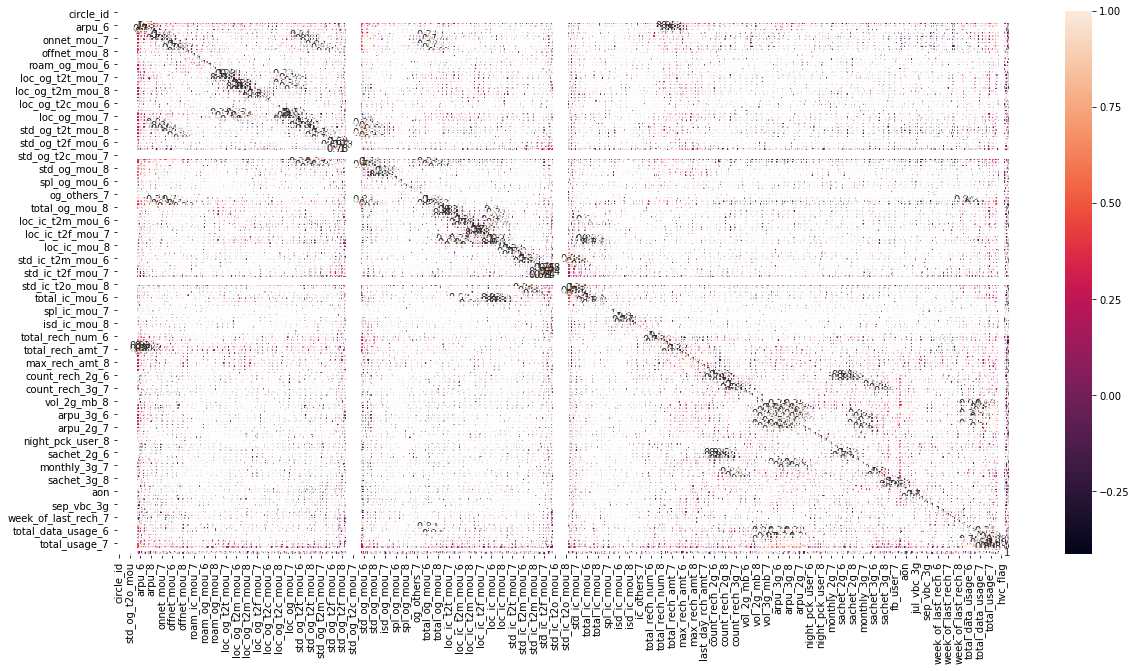

In [87]:
## Plot heatmap

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

# HERE HERE

In [88]:
# Viewing the shape of the data
df_out.shape

(27926, 168)

In [89]:
# Separating the churn_flag Column
churn_flag = df_out.pop('churn_flag')


In [90]:
df_out.pop('hvc_flag')

6        1
8        1
13       1
21       1
24       1
44       1
53       1
56       1
57       1
59       1
61       1
63       1
67       1
69       1
86       1
87       1
92       1
96       1
101      1
103      1
105      1
115      1
132      1
133      1
134      1
135      1
136      1
137      1
140      1
146      1
149      1
157      1
158      1
166      1
170      1
173      1
175      1
176      1
177      1
182      1
185      1
188      1
191      1
195      1
199      1
204      1
206      1
208      1
213      1
218      1
225      1
235      1
240      1
244      1
245      1
246      1
248      1
253      1
255      1
264      1
266      1
274      1
278      1
281      1
284      1
285      1
292      1
293      1
294      1
295      1
302      1
304      1
315      1
319      1
321      1
322      1
332      1
333      1
334      1
337      1
338      1
339      1
345      1
359      1
360      1
362      1
365      1
366      1
369      1
370      1
379      1

In [91]:
## Only one circle id
df_out.pop('circle_id')

6        109
8        109
13       109
21       109
24       109
44       109
53       109
56       109
57       109
59       109
61       109
63       109
67       109
69       109
86       109
87       109
92       109
96       109
101      109
103      109
105      109
115      109
132      109
133      109
134      109
135      109
136      109
137      109
140      109
146      109
149      109
157      109
158      109
166      109
170      109
173      109
175      109
176      109
177      109
182      109
185      109
188      109
191      109
195      109
199      109
204      109
206      109
208      109
213      109
218      109
225      109
235      109
240      109
244      109
245      109
246      109
248      109
253      109
255      109
264      109
266      109
274      109
278      109
281      109
284      109
285      109
292      109
293      109
294      109
295      109
302      109
304      109
315      109
319      109
321      109
322      109
332      109

In [92]:
# Viewing the head of the daya
df_out.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  arpu_6  arpu_7  arpu_8  \
6                0               0               0     429     190     255   
8                0               0               0     378     492     137   
13               0               0               0     492     205     593   
21               0               0               0     514     597     637   
24               0               0               0     422     359     354   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
6            71           45           76           262            49   
8           413          351           35            94            80   
13          501          108          534           413           119   
21          102          132           85           757           896   
24          124           55          141           450           370   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
6             92              0              0              0              0   
8            136              0              0              0              0   
13           482             23            144             72              7   
21           983              0              0              0              0   
24           283              9              0             13              9   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
6               0              0                71                45   
8               0              0               297               217   
13             35              1                49                 6   
21              0              0                 4                 6   
24              0             22                43                20   

    loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
6                 76               252                48                80   
8                 12                80                70                50   
13                36               151                47               294   
21                23                91                87               104   
24                 2               219               185                72   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
6                 10                 0                 0                 0   
8                  0                 0                 0                 0   
13                 4                 0                23                 0   
21                 0                 0                 1                 0   
24                12                18                20                 3   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
6                  0                 0           333            93   
8                  0                 7           378           288   
13                 0                 0           205            53   
21                 0                 0            97            94   
24                 0                 3           275           224   

    loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
6            156                 0                 0                 0   
8             63               116               133                22   
13           353               446                85               498   
21           129                97               125                61   
24            95                79                35               126   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
6                  0                 0                11                 0   
8                 13                10                75                 0   
13               255                52               156                 0   
21               665               808               876          

In [93]:
# Splitting the dataset into dependent and independent features (X and y)
X = df_out
y = churn_flag

#### Feature Scaling

Here we have normalize the continous variable while keeping the binary values intact

In [94]:
### subsetting all the continous vairables for scaling
columnNames = list(df_out.columns.values)
flag_col_names = ['fb_user_8','fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']
contColumnNames = list(set(columnNames) - set(flag_col_names))

In [95]:
## creating df with cont. variables
df_cont = df_out[contColumnNames]

In [96]:
## Creating scaled dataframe for modelling
normalized_df=(df_cont-df_cont.mean())/df_cont.std()
df_out = df_out.drop(contColumnNames, 1)
df_out = pd.concat([df_out,normalized_df],axis=1)
df_out.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
6                  0                 0                 0          0   
8                  0                 0                 0          0   
13                 0                 0                 0          0   
21                 0                 0                 0          0   
24                 0                 0                 0          0   

    fb_user_7  fb_user_8  loc_ic_t2m_mou_7    arpu_8  arpu_3g_7  \
6           0          0          0.580722 -0.620546  -0.389737   
8           1          1         -0.704140 -1.003565  -0.389737   
13          0          1         -0.684250  0.476573  -0.389737   
21          0          0         -0.461488  0.619393  -0.389737   
24          0          0         -0.322262 -0.299201  -0.389737   

    roam_og_mou_7  sep_vbc_3g  og_others_6  count_rech_3g_6  vol_3g_mb_7  \
6       -0.197932   -0.142225    -0.084535        -0.341205     -0.48894   
8       -0.197932   -0.142225    -0.084535        -0.341205      0.61664   
13       0.503870   -0.142225    -0.084535        -0.341205     -0.48894   
21      -0.197932   -0.142225    -0.084535        -0.341205     -0.48894   
24      -0.197932   -0.142225    -0.084535        -0.341205     -0.48894   

    jul_vbc_3g  vol_2g_mb_7  std_og_t2c_mou_6  spl_og_mou_6  total_rech_amt_6  \
6    -0.427129    -0.359687               NaN      -0.27895         -0.234820   
8     1.855303     0.679926               NaN      -0.27895         -0.405755   
13   -0.427129    -0.359687               NaN      -0.27895         -0.212764   
21   -0.427129    -0.359687               NaN      -0.27895          0.043640   
24   -0.427129    -0.359687               NaN       0.19755         -0.397484   

    sachet_2g_7  offnet_mou_7  std_ic_t2m_mou_6  sachet_2g_6  total_ic_mou_8  \
6     -0.346021     -0.756526         -0.293683    -0.334248        4.384255   
8      0.085536     -0.682671         -0.129582    -0.334248       -0.809970   
13    -0.346021     -0.589757          2.105318    -0.334248        1.913919   
21    -0.346021      1.261380          0.222063    -0.334248       -0.218345   
24    -0.346021      0.008230          0.081405    -0.334248       -0.348744   

    monthly_2g_6  std_ic_t2t_mou_7  loc_ic_t2f_mou_8  week_of_last_rech_8  \
6      -0.430956         -0.236275         -0.297722             0.367820   
8      -0.430956         -0.236275         -0.332516            -0.637096   
13     -0.430956          0.265344         -0.210738            -0.637096   
21     -0.430956         -0.170273         -0.158547            -1.139553   
24     -0.430956         -0.038268          1.215805            -1.139553   

    loc_og_t2m_mou_8       aon  total_og_mou_7  last_day_rch_amt_6  \
6          -0.353253  0.414670       -0.877098           -0.515131   
8          -0.494689 -0.974327       -0.327291           -0.395121   
13          0.655654  1.369989       -0.717214            0.158769   
21         -0.240105 -0.560083        0.646701           -0.579751   
24         -0.390969  1.845602       -0.337080            0.158769   

    loc_ic_t2m_mou_6  std_og_t2t_mou_7  loc_og_mou_6  isd_ic_mou_7  \
6           0.232173         -0.451047      0.174723     -0.176247   
8          -0.521280         -0.104761      0.300996     -0.176247   
13         -0.185973         -0.229736     -0.184452      0.488697   
21         -0.280648         -0.125590     -0.487506     -0.176247   
24         -0.111022         -0.359919      0.011972     -0.144072   

    std_og_mou_7  std_ic_t2f_mou_6  offnet_mou_8  day_of_last_rech_6  \
6      -0.634170         -0.147764     -0.596594           -0.358991   
8      -0.379149         -0.147764     -0.482495            0.282662   
13     -0.388066         -0.147764      0.414740            1.352084   
21      1.031493         -0.147764      1.713915           -0.786760   
24     -0.275714          2.676394     -0.101300            0.710431   

    roam_og

#### Dropping columns with only 0 values

In [97]:
df_out = df_out.drop(['std_og_t2c_mou_6','std_og_t2c_mou_8','std_og_t2o_mou','loc_ic_t2o_mou','std_ic_t2o_mou_8','std_ic_t2o_mou_6','loc_og_t2o_mou','std_ic_t2o_mou_7','std_og_t2c_mou_7'], 1)
df_out.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
6                  0                 0                 0          0   
8                  0                 0                 0          0   
13                 0                 0                 0          0   
21                 0                 0                 0          0   
24                 0                 0                 0          0   

    fb_user_7  fb_user_8  loc_ic_t2m_mou_7    arpu_8  arpu_3g_7  \
6           0          0          0.580722 -0.620546  -0.389737   
8           1          1         -0.704140 -1.003565  -0.389737   
13          0          1         -0.684250  0.476573  -0.389737   
21          0          0         -0.461488  0.619393  -0.389737   
24          0          0         -0.322262 -0.299201  -0.389737   

    roam_og_mou_7  sep_vbc_3g  og_others_6  count_rech_3g_6  vol_3g_mb_7  \
6       -0.197932   -0.142225    -0.084535        -0.341205     -0.48894   
8       -0.197932   -0.142225    -0.084535        -0.341205      0.61664   
13       0.503870   -0.142225    -0.084535        -0.341205     -0.48894   
21      -0.197932   -0.142225    -0.084535        -0.341205     -0.48894   
24      -0.197932   -0.142225    -0.084535        -0.341205     -0.48894   

    jul_vbc_3g  vol_2g_mb_7  spl_og_mou_6  total_rech_amt_6  sachet_2g_7  \
6    -0.427129    -0.359687      -0.27895         -0.234820    -0.346021   
8     1.855303     0.679926      -0.27895         -0.405755     0.085536   
13   -0.427129    -0.359687      -0.27895         -0.212764    -0.346021   
21   -0.427129    -0.359687      -0.27895          0.043640    -0.346021   
24   -0.427129    -0.359687       0.19755         -0.397484    -0.346021   

    offnet_mou_7  std_ic_t2m_mou_6  sachet_2g_6  total_ic_mou_8  monthly_2g_6  \
6      -0.756526         -0.293683    -0.334248        4.384255     -0.430956   
8      -0.682671         -0.129582    -0.334248       -0.809970     -0.430956   
13     -0.589757          2.105318    -0.334248        1.913919     -0.430956   
21      1.261380          0.222063    -0.334248       -0.218345     -0.430956   
24      0.008230          0.081405    -0.334248       -0.348744     -0.430956   

    std_ic_t2t_mou_7  loc_ic_t2f_mou_8  week_of_last_rech_8  loc_og_t2m_mou_8  \
6          -0.236275         -0.297722             0.367820         -0.353253   
8          -0.236275         -0.332516            -0.637096         -0.494689   
13          0.265344         -0.210738            -0.637096          0.655654   
21         -0.170273         -0.158547            -1.139553         -0.240105   
24         -0.038268          1.215805            -1.139553         -0.390969   

         aon  total_og_mou_7  last_day_rch_amt_6  loc_ic_t2m_mou_6  \
6   0.414670       -0.877098           -0.515131          0.232173   
8  -0.974327       -0.327291           -0.395121         -0.521280   
13  1.369989       -0.717214            0.158769         -0.185973   
21 -0.560083        0.646701           -0.579751         -0.280648   
24  1.845602       -0.337080            0.158769         -0.111022   

    std_og_t2t_mou_7  loc_og_mou_6  isd_ic_mou_7  std_og_mou_7  \
6          -0.451047      0.174723     -0.176247     -0.634170   
8          -0.104761      0.300996     -0.176247     -0.379149   
13         -0.229736     -0.184452      0.488697     -0.388066   
21         -0.125590     -0.487506     -0.176247      1.031493   
24         -0.359919      0.011972     -0.144072     -0.275714   

    std_ic_t2f_mou_6  offnet_mou_8  day_of_last_rech_6  roam_og_mou_8  \
6          -0.147764     -0.596594           -0.358991      -0.206093   
8          -0.147764     -0.482495            0.282662      -0.206093   
13         -0.147764      0.414740            1.352084      -0.189702   
21         -0.147764      1.713915           -0.786760      -0.206093   
24          2.676394     -0.101300            0.710431       0.154520   

    total_rech_amt_8  isd_og_

#### Splitting into train and test dataset

In [98]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

#### Handling Class Imbalance using SMOTE Technique

In [99]:
from imblearn.over_sampling import SMOTE

## check sampling strategy again
sm = SMOTE(random_state=100, sampling_strategy='minority')
X_train, y_train = sm.fit_sample(X_train, y_train)